In [3]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [4]:
def count_words(text):
    """Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts.
    Skip punctuation."""
    
    text= text.lower()
    skips = [".", ",", ";", ":", "'", '"']

    for ch in skips:
        text = text.replace(ch, "")

    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

In [5]:
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [6]:
from collections import Counter

In [7]:
def count_words_fast(text):
    """Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts.
    Skip punctuation."""
    
    text= text.lower()
    skips = [".", ",", ";", ":", "'", '"']

    for ch in skips:
        text = text.replace(ch, "")

    word_counts = Counter(text.split(" "))

    return word_counts

In [8]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [9]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [10]:
count_words(text) is count_words_fast(text)

False

In [11]:
def read_book(title_path):
    """Read a book and return it as a string."""
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    
    return text

In [12]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [13]:
ind = text.find("What's in a name?")

In [14]:
sample_text = text[ind:ind + 1000]

In [15]:
def word_stats(word_counts):
    """Return number of unique words and word frequencies."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [16]:
text_en = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [17]:
word_counts = count_words(text_en)

In [18]:
(num_unique, counts) = word_stats(word_counts)

In [19]:
num_unique

5118

In [20]:
text_de = read_book("./Books/German/shakespeare/Romeo und Julia.txt")

In [21]:
word_counts_de = count_words(text_de)

In [22]:
(num_unique_de, counts_de) = word_stats(word_counts_de)

In [23]:
num_unique_de

7527

In [25]:
import os
book_dir = "./Books"

In [55]:
import pandas as pd
stats = pd.DataFrame(columns= ("language", "author", "title", "length", "unique"))
title_num = 1

In [56]:
for language in os.listdir(book_dir):
    if not language.startswith('.'):
        for author in os.listdir(book_dir + "/" + language):
            if not author.startswith('.'):
                for title in os.listdir(book_dir + "/" + language + "/" + author):
                    if not title.startswith('.'):
                        input_file = book_dir + "/" + language + "/" + author + "/" + title
                        text = read_book(input_file)
                        (num_unique, counts) = word_stats(count_words(text))
                        stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique 
                        title_num += 1

In [57]:
stats

,language,author,title,length,unique
1,German,Schiller,Wallensteins Lager,15443,4379
2,German,Schiller,die braut von messina,26482,6655
3,German,Schiller,"Der Parasit, oder die Kunst, sein GlÅck zu ma...",20450,6159
4,German,Schiller,Die Verschwîrung des Fiesco zu Genua,31128,10371
5,German,Schiller,Kabale und Liebe,30929,9969
...,...,...,...,...,...
98,French,Sand,La Marquise,14716,4786
99,French,Sand,L' Orco,8748,3162
100,French,Sand,Mattea,21089,6429
101,French,Sand,Metella,19600,5715


In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of unique words')

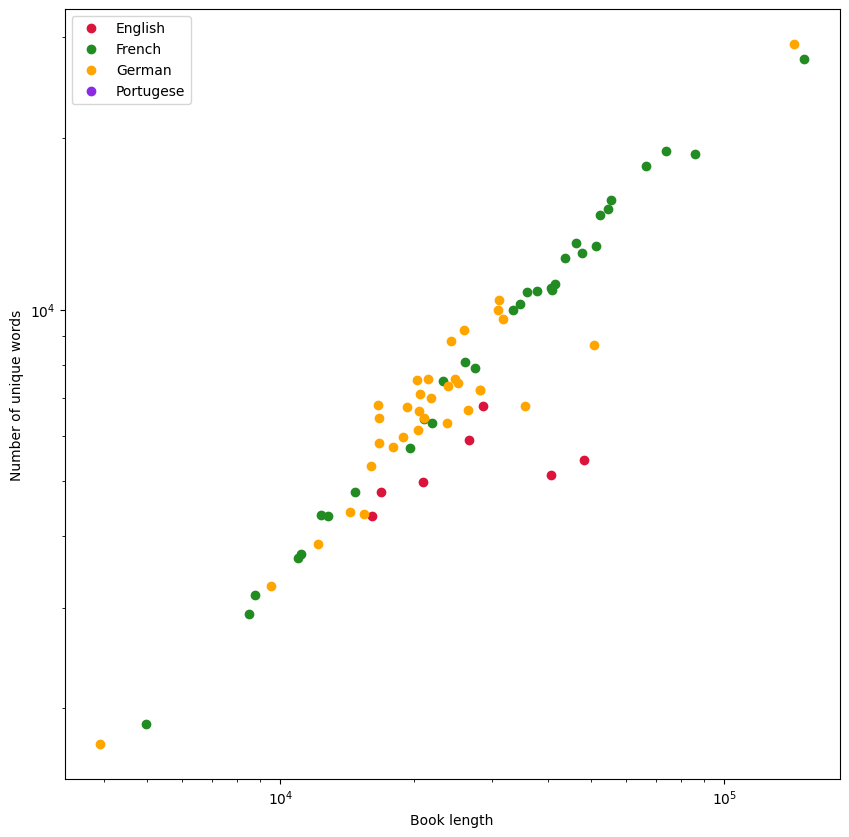

In [59]:
plt.figure(figsize= (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portugese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portugese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")

In [60]:
stats["length"]

1      15443
2      26482
3      20450
4      31128
5      30929
       ...  
98     14716
99      8748
100    21089
101    19600
102    23210
Name: length, Length: 102, dtype: int64